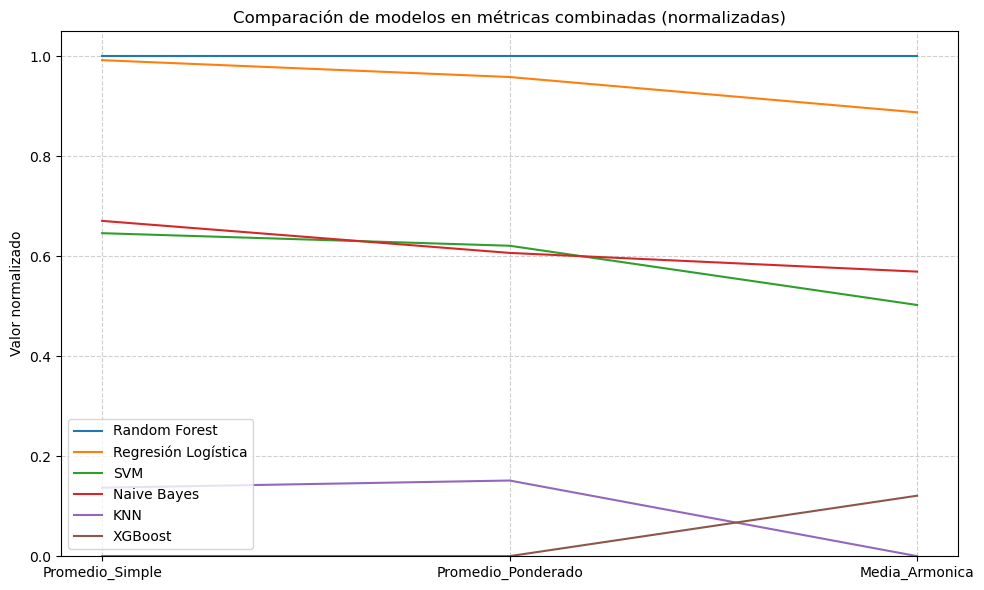

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# === 1. Datos de resumen de métricas ===
resumen_modelos = {
    "Modelo": ["Random Forest", "Regresión Logística", "SVM", "Naive Bayes", "KNN", "XGBoost"],
    "Promedio_Simple": [0.6613, 0.6608, 0.6383, 0.6399, 0.6052, 0.5963],
    "Promedio_Ponderado": [0.6377, 0.6351, 0.6139, 0.6130, 0.5844, 0.5749],
    "Media_Armonica": [0.6065, 0.5976, 0.5670, 0.5723, 0.5271, 0.5367]
}

# === 2. Crear DataFrame ===
df = pd.DataFrame(resumen_modelos)

# === 3. Normalizar los valores entre 0 y 1 ===
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:])
df_normalized["Modelo"] = df["Modelo"]

# === 4. Reordenar para graficar (modelo en columnas) ===
df_normalized = df_normalized.set_index("Modelo").T

# === 5. Graficar ===
plt.figure(figsize=(10, 6))
for modelo in df_normalized.columns:
    plt.plot(df_normalized.index, df_normalized[modelo], label=modelo)

plt.title("Comparación de modelos en métricas combinadas (normalizadas)")
plt.ylabel("Valor normalizado")
plt.xlabel("")
plt.ylim(0, 1.05)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(loc='best')
plt.tight_layout()
plt.show()
